In [1]:
%matplotlib inline
import pandas as pd


tripsDataFile = '../201402_Trips_WithBicycleDistanceSpeed.csv'

trips = pd.DataFrame.from_csv(tripsDataFile)
trips = trips[(trips['Duration'] <= 5400) & (trips['Duration'] > 60)]


/Users/p2723777/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:

import datetime as datetime
# def groupByHour(starttime):
#     startdatetime = datetime.datetime.strptime(starttime, '%m/%d/%Y %H:%M')
#     return startdatetime.hour


def groupByHour(timestamp):
    year = timestamp.year
    month = timestamp.month
    day = timestamp.day
    hour = timestamp.hour
    return datetime.datetime(year, month, day, hour, 0)

In [52]:

trips['starthour']=trips['Start Date'].map(groupByHour)
tripStationHours=trips[['Start Station', 'starthour']].reset_index()

tripStationHourCounts = tripStationHours.groupby(['Start Station', 'starthour'])['Trip ID'].count().reset_index(name="startTripCount")
# tripStationHourCounts=tripStationHourCounts.reset_index()
tripStationHourCounts.rename(columns={'Start Station': 'station'}, inplace=True)

trips['endhour']=trips['End Date'].map(groupByHour)
tripEndStationHours=trips[['End Station', 'endhour']].reset_index()

tripEndStationHourCounts = tripEndStationHours.groupby(['End Station', 'endhour'])['Trip ID'].count().reset_index(name="endingTripCount")
# tripEndStationHourCounts=tripEndStationHourCounts.reset_index()
tripEndStationHourCounts.rename(columns={'End Station': 'station'}, inplace=True)


In [53]:
tripStationHourCounts

,station,starthour,startTripCount
0,2nd at Folsom,0,9
1,2nd at Folsom,1,1
2,2nd at Folsom,2,3
3,2nd at Folsom,3,2
4,2nd at Folsom,4,27
5,2nd at Folsom,5,51
6,2nd at Folsom,6,79
7,2nd at Folsom,7,144
8,2nd at Folsom,8,352
9,2nd at Folsom,9,268


In [54]:
tripEndStationHourCounts

,station,endhour,endingTripCount
0,2nd at Folsom,0,10
1,2nd at Folsom,1,4
2,2nd at Folsom,2,2
3,2nd at Folsom,3,1
4,2nd at Folsom,4,2
5,2nd at Folsom,5,5
6,2nd at Folsom,6,40
7,2nd at Folsom,7,111
8,2nd at Folsom,8,325
9,2nd at Folsom,9,319


In [22]:



import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')


In [34]:

import pandas as pd
stationData = pd.DataFrame.from_csv('../201402_station_data.csv')
# # help(sampleTripMilestones)
# type(stationData.name)


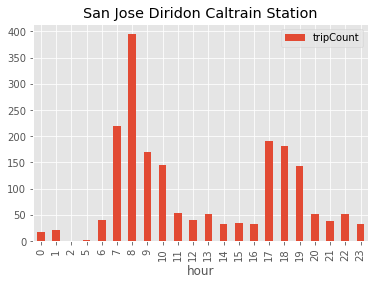

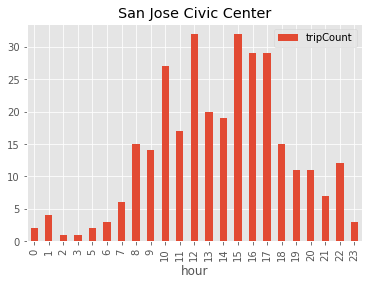

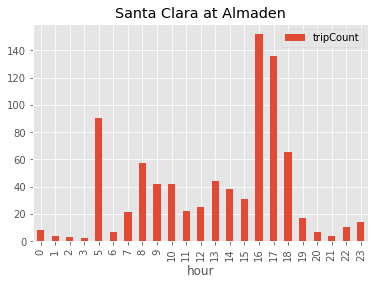

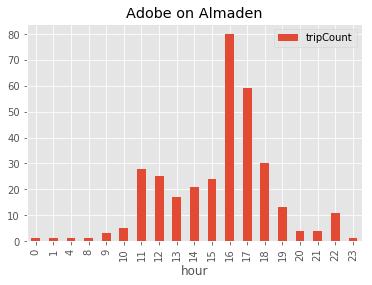

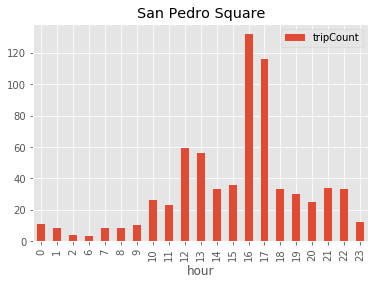

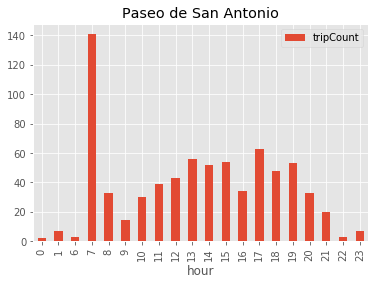

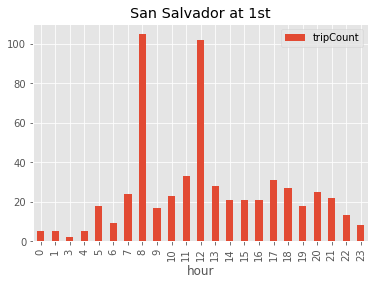

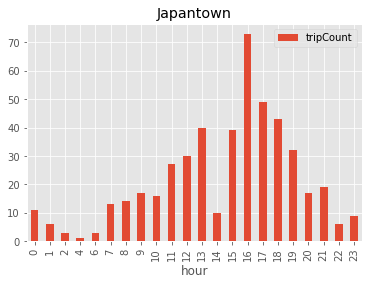

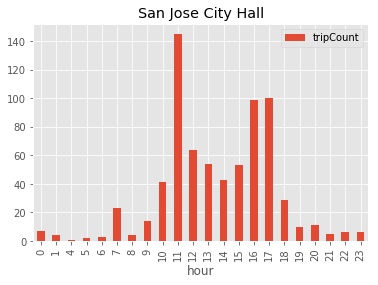

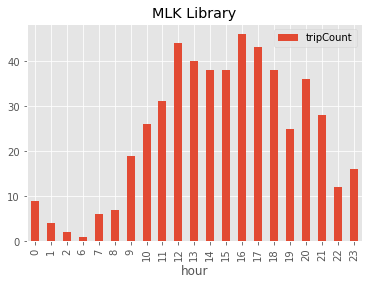

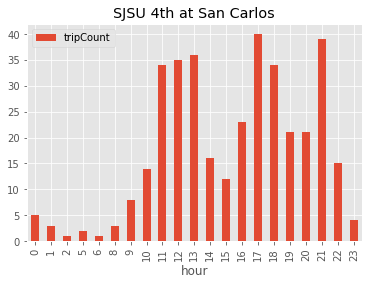

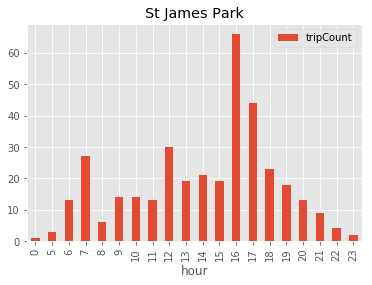

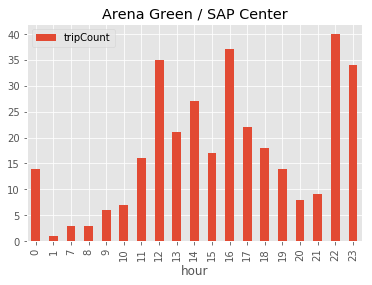

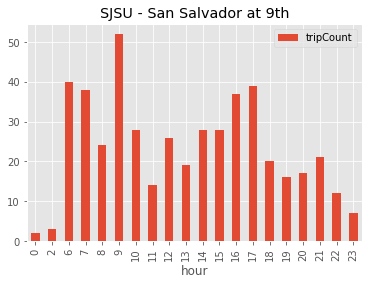

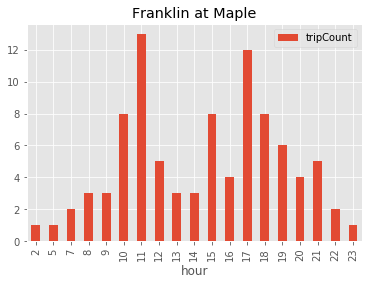

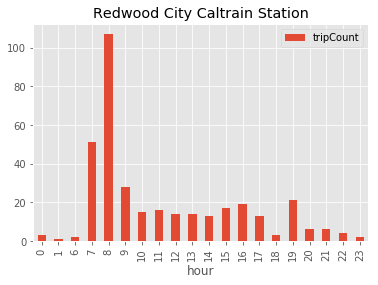

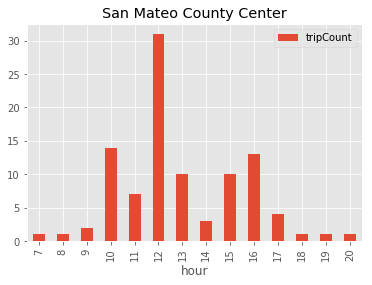

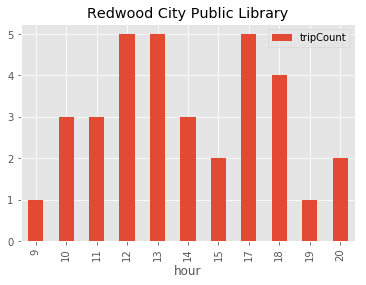

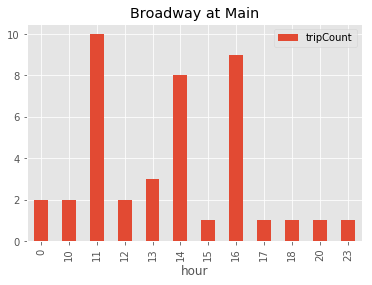

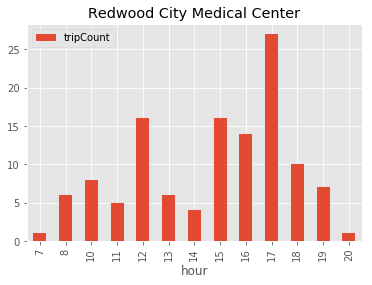

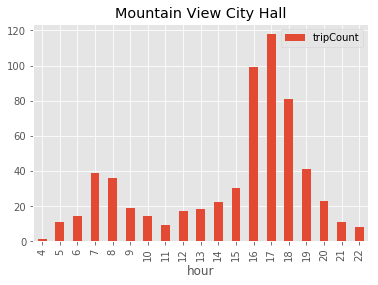

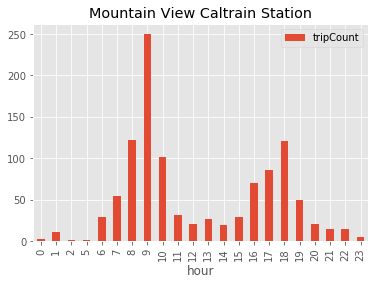

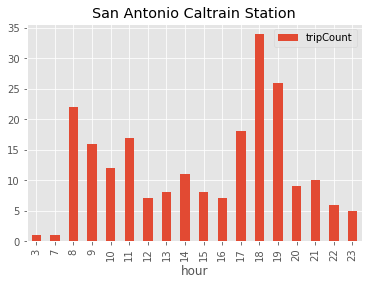

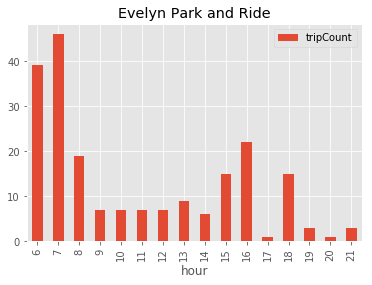

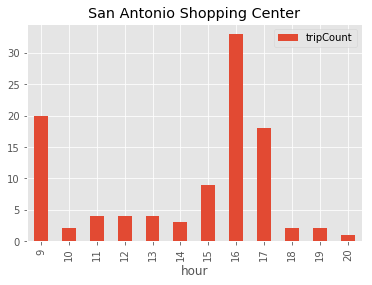

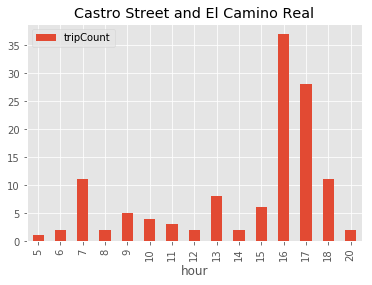

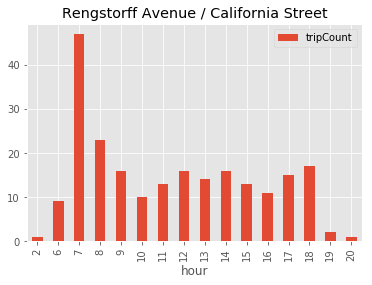

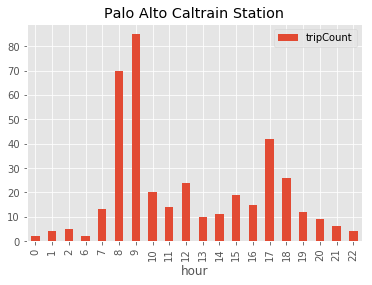

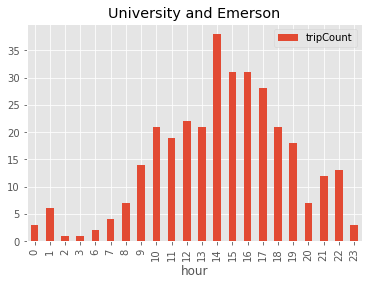

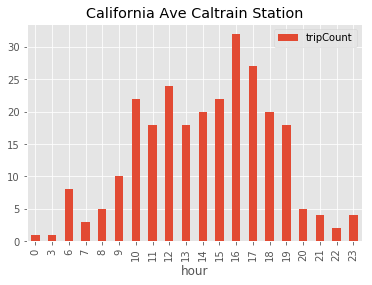

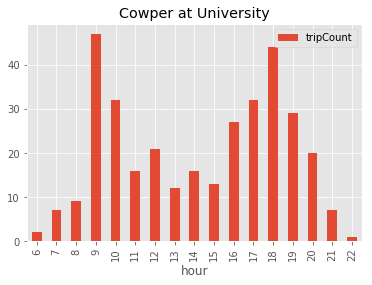

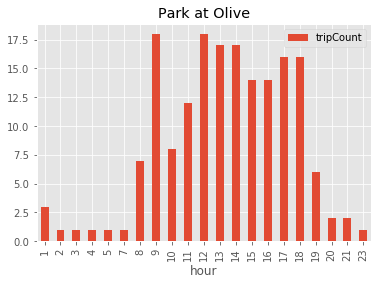

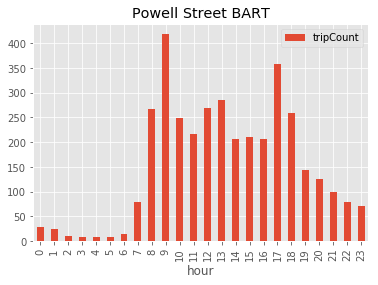

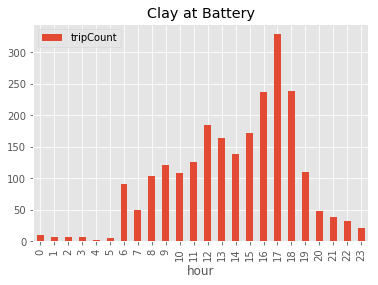

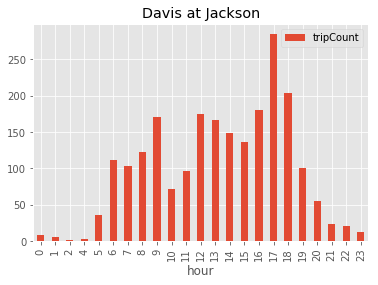

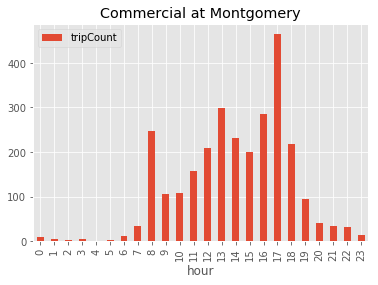

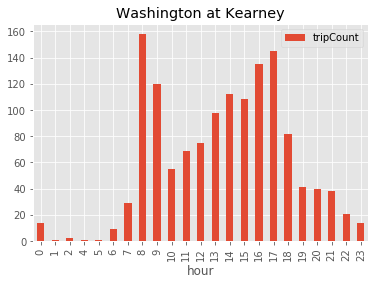

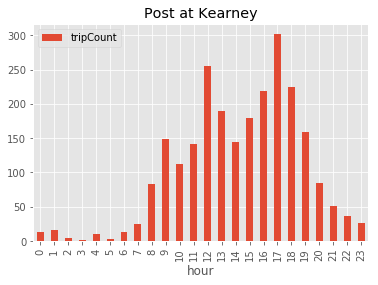

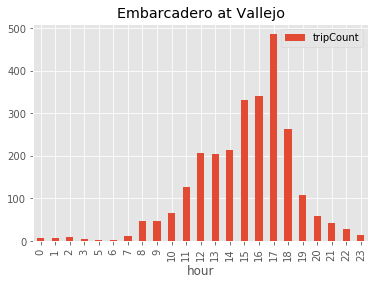

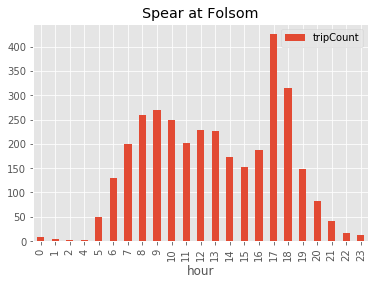

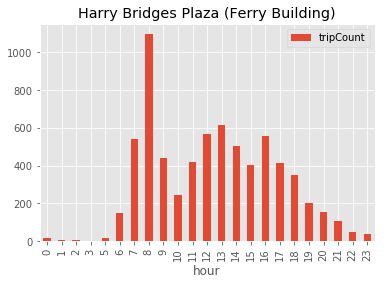

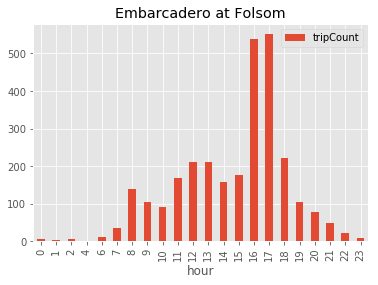

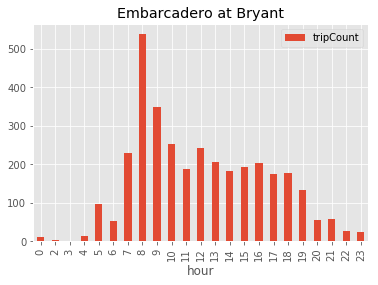

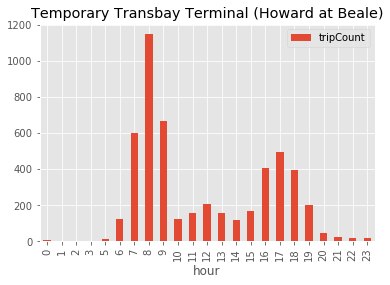

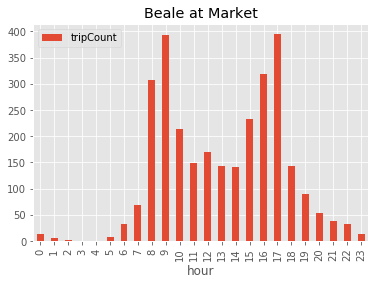

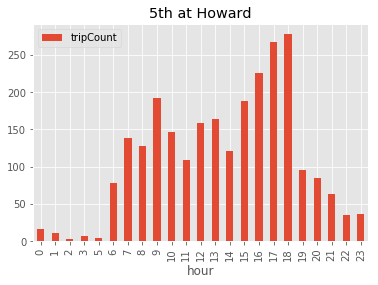

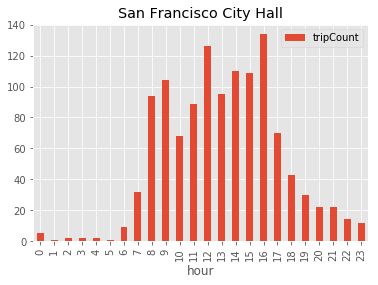

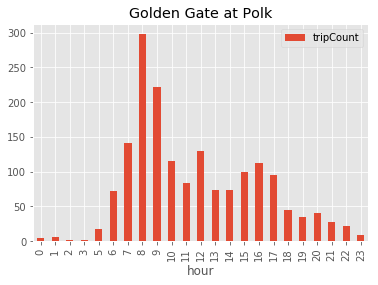

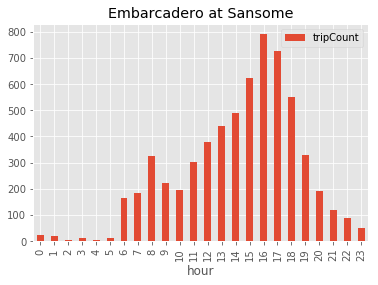

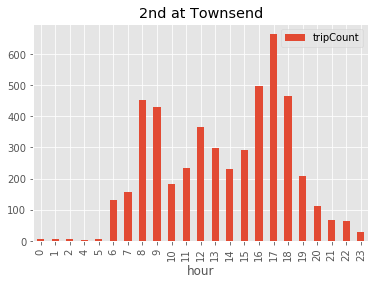

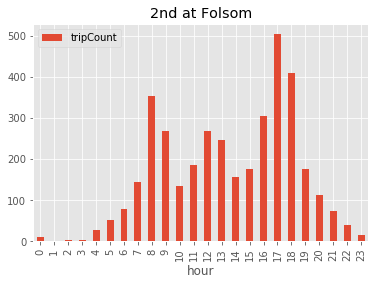

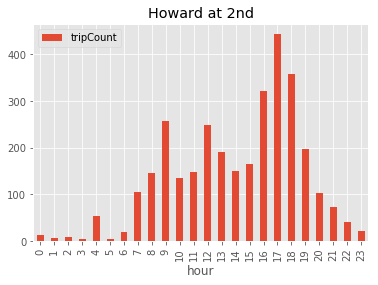

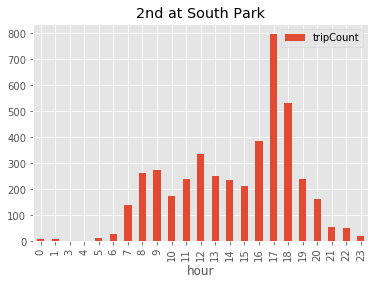

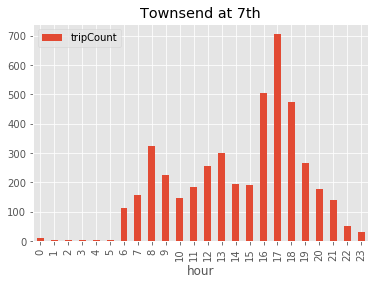

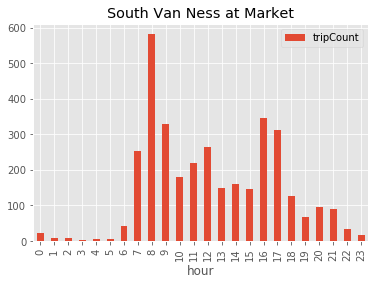

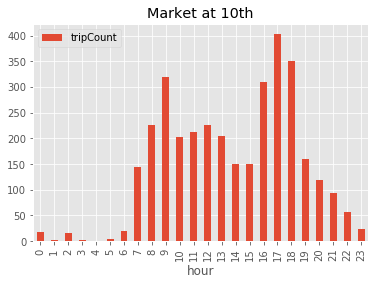

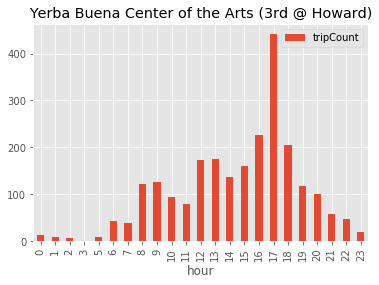

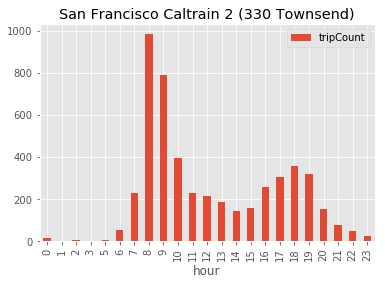

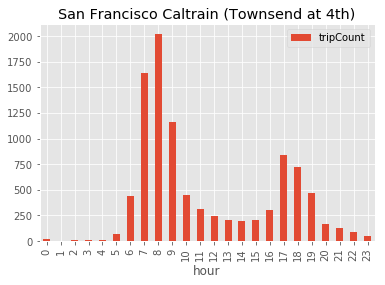

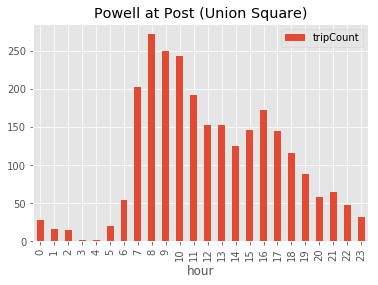

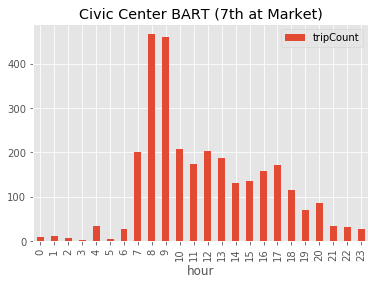

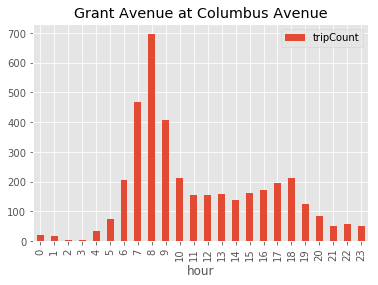

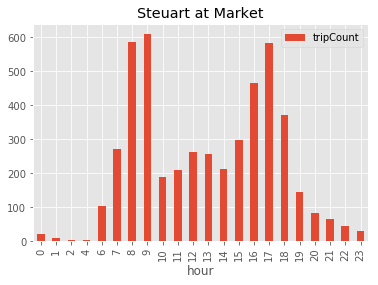

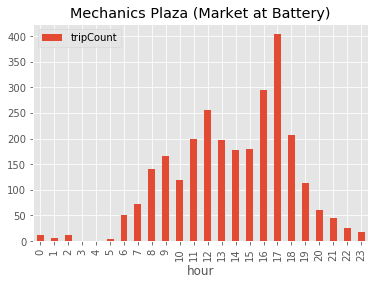

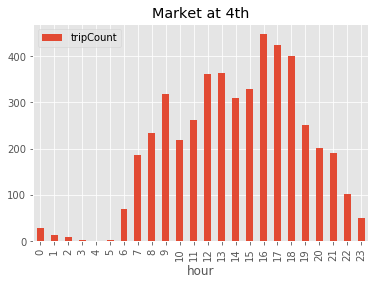

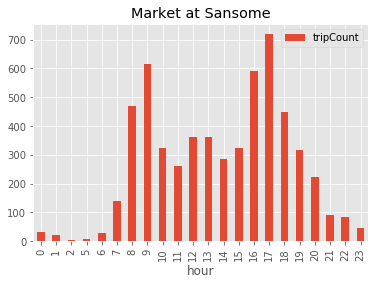

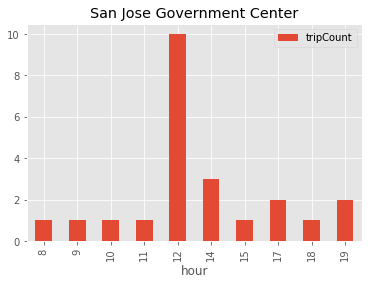

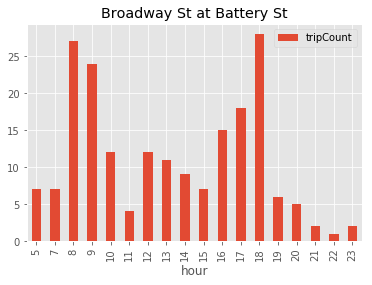

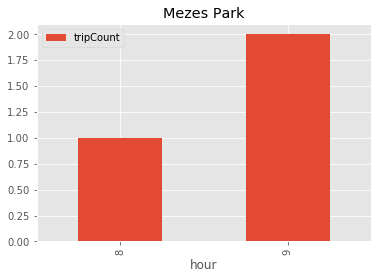

In [40]:
import matplotlib.pyplot as plt
for startStationEntry in stationData.name.iteritems():
    startStation=startStationEntry[1]
#     print(startStation)
    plot = tripStationHourCounts[tripStationHourCounts['Start Station']==startStation].plot(x='hour', y='tripCount', kind='bar',title=startStation)
    fig = plot.get_figure()
    fig.savefig("./hourlyPatterns/"+startStation.replace(' ', '').replace('/','')+".png")